In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Carga desde un archivo .csv sin indice
data= pd.read_csv('Ventas_totales.csv') 
data

,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,tarjetas_credito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,01/01/2017,27858.9,27477.3,2.785887e+07,2.759173e+07,2.671420e+05,2.785887e+07,1.023010e+07,6.864575e+06,9.047205e+06,...,6.705475e+06,9.459063e+05,2.880656e+06,2.606193e+06,1.050314e+06,3.407774e+05,4.397544e+06,7.723718e+05,1.838507e+06,2.806660e+06
1,01/02/2017,25994.2,25223.4,2.599420e+07,2.574918e+07,2.450208e+05,2.599420e+07,9.719067e+06,6.438494e+06,8.309150e+06,...,6.576625e+06,9.256186e+05,2.855640e+06,2.600084e+06,1.026167e+06,3.282887e+05,4.053284e+06,6.722905e+05,1.257662e+06,2.354085e+06
2,01/03/2017,27780.0,26334.3,2.778001e+07,2.747223e+07,3.077778e+05,2.778001e+07,1.024444e+07,6.908523e+06,8.845010e+06,...,7.437264e+06,1.016148e+06,3.188259e+06,2.824977e+06,1.075526e+06,3.533352e+05,4.354198e+06,6.676967e+05,1.305675e+06,2.266189e+06
3,01/04/2017,29134.3,27045.9,2.913427e+07,2.882748e+07,3.067927e+05,2.913427e+07,1.031263e+07,7.454252e+06,9.458167e+06,...,8.211244e+06,1.132396e+06,3.257140e+06,3.006159e+06,1.037213e+06,3.596945e+05,4.355707e+06,8.389482e+05,1.535726e+06,2.146756e+06
4,01/05/2017,27969.0,25631.9,2.796900e+07,2.756931e+07,3.996933e+05,2.796900e+07,1.014761e+07,6.735747e+06,9.220930e+06,...,7.651058e+06,1.033082e+06,3.232636e+06,2.799142e+06,9.826512e+05,3.365680e+05,4.206102e+06,9.158951e+05,1.824462e+06,2.117971e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,01/01/2022,154517.1,45463.4,1.545171e+08,1.496976e+08,4.819480e+06,1.545171e+08,4.696260e+07,4.605365e+07,5.404833e+07,...,3.750517e+07,4.860318e+06,1.610477e+07,1.740849e+07,6.138441e+06,1.401929e+06,2.133021e+07,3.782646e+06,1.218755e+07,1.343307e+07
61,01/02/2022,152202.6,23802.1,1.522026e+08,1.484065e+08,3.796044e+06,1.522026e+08,4.629096e+07,4.528358e+07,5.370589e+07,...,3.820979e+07,5.045920e+06,1.613982e+07,1.826074e+07,6.436028e+06,1.370640e+06,2.030545e+07,NaN,9.189746e+06,1.330139e+07
62,01/03/2022,16.5,24612.4,1.689825e+08,1.643211e+08,4.661350e+05,1.689825e+08,5.126208e+07,4.736436e+07,NaN,...,4.541886e+07,5.922820e+06,1.841916e+07,2.082760e+07,6.886240e+06,1.589119e+06,2.294201e+07,3.912852e+06,1.089879e+07,NaN
63,01/04/2022,177148.1,24140.5,1.771481e+08,1.730038e+08,4.144284e+06,1.771481e+08,5.319000e+07,5.006397e+07,6.535759e+07,...,4.999168e+07,6.746167e+06,1.930946e+07,2.287784e+07,6.510666e+06,1.719459e+06,2.313127e+07,4.228054e+06,NaN,1.191048e+07


In [3]:
#Identificar valores nulos
valores_nulos=data.isnull().sum()
valores_nulos

indice_tiempo                           0
ventas_precios_corrientes               0
ventas_precios_constantes               0
ventas_totales_canal_venta              0
salon_ventas                            6
canales_on_line                         0
ventas_totales_medio_pago               0
efectivo                                0
tarjetas_debito                         1
tarjetas_credito                        7
otros_medios                            1
ventas_totales_grupo_articulos          0
subtotal_ventas_alimentos_bebidas      10
bebidas                                 1
almacen                                 2
panaderia                               1
lacteos                                 1
carnes                                  1
verduleria_fruteria                     1
alimentos_preparados_rotiseria          1
articulos_limpieza_perfumeria           0
indumentaria_calzado_textiles_hogar     2
electronicos_articulos_hogar            3
otros                             

In [4]:
#Realizamos una copia del dataframe
data2=data.copy()

In [5]:
#La primera transformación que se le hará a nuestra base de datos será el sustituir valores nulos con promedio o media de las variables 
#Salon_ventas , subtotal_ventas_alimentos_bebidas y otros
data2["salon_ventas"]=data2["salon_ventas"].fillna(round(data["salon_ventas"].mean(),1))
data2

,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,tarjetas_credito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,01/01/2017,27858.9,27477.3,2.785887e+07,2.759173e+07,2.671420e+05,2.785887e+07,1.023010e+07,6.864575e+06,9.047205e+06,...,6.705475e+06,9.459063e+05,2.880656e+06,2.606193e+06,1.050314e+06,3.407774e+05,4.397544e+06,7.723718e+05,1.838507e+06,2.806660e+06
1,01/02/2017,25994.2,25223.4,2.599420e+07,2.574918e+07,2.450208e+05,2.599420e+07,9.719067e+06,6.438494e+06,8.309150e+06,...,6.576625e+06,9.256186e+05,2.855640e+06,2.600084e+06,1.026167e+06,3.282887e+05,4.053284e+06,6.722905e+05,1.257662e+06,2.354085e+06
2,01/03/2017,27780.0,26334.3,2.778001e+07,2.747223e+07,3.077778e+05,2.778001e+07,1.024444e+07,6.908523e+06,8.845010e+06,...,7.437264e+06,1.016148e+06,3.188259e+06,2.824977e+06,1.075526e+06,3.533352e+05,4.354198e+06,6.676967e+05,1.305675e+06,2.266189e+06
3,01/04/2017,29134.3,27045.9,2.913427e+07,2.882748e+07,3.067927e+05,2.913427e+07,1.031263e+07,7.454252e+06,9.458167e+06,...,8.211244e+06,1.132396e+06,3.257140e+06,3.006159e+06,1.037213e+06,3.596945e+05,4.355707e+06,8.389482e+05,1.535726e+06,2.146756e+06
4,01/05/2017,27969.0,25631.9,2.796900e+07,2.756931e+07,3.996933e+05,2.796900e+07,1.014761e+07,6.735747e+06,9.220930e+06,...,7.651058e+06,1.033082e+06,3.232636e+06,2.799142e+06,9.826512e+05,3.365680e+05,4.206102e+06,9.158951e+05,1.824462e+06,2.117971e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,01/01/2022,154517.1,45463.4,1.545171e+08,1.496976e+08,4.819480e+06,1.545171e+08,4.696260e+07,4.605365e+07,5.404833e+07,...,3.750517e+07,4.860318e+06,1.610477e+07,1.740849e+07,6.138441e+06,1.401929e+06,2.133021e+07,3.782646e+06,1.218755e+07,1.343307e+07
61,01/02/2022,152202.6,23802.1,1.522026e+08,1.484065e+08,3.796044e+06,1.522026e+08,4.629096e+07,4.528358e+07,5.370589e+07,...,3.820979e+07,5.045920e+06,1.613982e+07,1.826074e+07,6.436028e+06,1.370640e+06,2.030545e+07,NaN,9.189746e+06,1.330139e+07
62,01/03/2022,16.5,24612.4,1.689825e+08,1.643211e+08,4.661350e+05,1.689825e+08,5.126208e+07,4.736436e+07,NaN,...,4.541886e+07,5.922820e+06,1.841916e+07,2.082760e+07,6.886240e+06,1.589119e+06,2.294201e+07,3.912852e+06,1.089879e+07,NaN
63,01/04/2022,177148.1,24140.5,1.771481e+08,1.730038e+08,4.144284e+06,1.771481e+08,5.319000e+07,5.006397e+07,6.535759e+07,...,4.999168e+07,6.746167e+06,1.930946e+07,2.287784e+07,6.510666e+06,1.719459e+06,2.313127e+07,4.228054e+06,NaN,1.191048e+07


In [6]:
#Identificar valores nulos
valores_nulos=data2.isnull().sum()
valores_nulos

indice_tiempo                           0
ventas_precios_corrientes               0
ventas_precios_constantes               0
ventas_totales_canal_venta              0
salon_ventas                            0
canales_on_line                         0
ventas_totales_medio_pago               0
efectivo                                0
tarjetas_debito                         1
tarjetas_credito                        7
otros_medios                            1
ventas_totales_grupo_articulos          0
subtotal_ventas_alimentos_bebidas      10
bebidas                                 1
almacen                                 2
panaderia                               1
lacteos                                 1
carnes                                  1
verduleria_fruteria                     1
alimentos_preparados_rotiseria          1
articulos_limpieza_perfumeria           0
indumentaria_calzado_textiles_hogar     2
electronicos_articulos_hogar            3
otros                             

In [7]:
#Sustitución de valores nulos con promedio o media de la variable subtotal_ventas_alimentos_bebidas
data2["subtotal_ventas_alimentos_bebidas"]=data2["subtotal_ventas_alimentos_bebidas"].fillna(round(data["subtotal_ventas_alimentos_bebidas"].mean(),1))
data2

,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,tarjetas_credito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,01/01/2017,27858.9,27477.3,2.785887e+07,2.759173e+07,2.671420e+05,2.785887e+07,1.023010e+07,6.864575e+06,9.047205e+06,...,6.705475e+06,9.459063e+05,2.880656e+06,2.606193e+06,1.050314e+06,3.407774e+05,4.397544e+06,7.723718e+05,1.838507e+06,2.806660e+06
1,01/02/2017,25994.2,25223.4,2.599420e+07,2.574918e+07,2.450208e+05,2.599420e+07,9.719067e+06,6.438494e+06,8.309150e+06,...,6.576625e+06,9.256186e+05,2.855640e+06,2.600084e+06,1.026167e+06,3.282887e+05,4.053284e+06,6.722905e+05,1.257662e+06,2.354085e+06
2,01/03/2017,27780.0,26334.3,2.778001e+07,2.747223e+07,3.077778e+05,2.778001e+07,1.024444e+07,6.908523e+06,8.845010e+06,...,7.437264e+06,1.016148e+06,3.188259e+06,2.824977e+06,1.075526e+06,3.533352e+05,4.354198e+06,6.676967e+05,1.305675e+06,2.266189e+06
3,01/04/2017,29134.3,27045.9,2.913427e+07,2.882748e+07,3.067927e+05,2.913427e+07,1.031263e+07,7.454252e+06,9.458167e+06,...,8.211244e+06,1.132396e+06,3.257140e+06,3.006159e+06,1.037213e+06,3.596945e+05,4.355707e+06,8.389482e+05,1.535726e+06,2.146756e+06
4,01/05/2017,27969.0,25631.9,2.796900e+07,2.756931e+07,3.996933e+05,2.796900e+07,1.014761e+07,6.735747e+06,9.220930e+06,...,7.651058e+06,1.033082e+06,3.232636e+06,2.799142e+06,9.826512e+05,3.365680e+05,4.206102e+06,9.158951e+05,1.824462e+06,2.117971e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,01/01/2022,154517.1,45463.4,1.545171e+08,1.496976e+08,4.819480e+06,1.545171e+08,4.696260e+07,4.605365e+07,5.404833e+07,...,3.750517e+07,4.860318e+06,1.610477e+07,1.740849e+07,6.138441e+06,1.401929e+06,2.133021e+07,3.782646e+06,1.218755e+07,1.343307e+07
61,01/02/2022,152202.6,23802.1,1.522026e+08,1.484065e+08,3.796044e+06,1.522026e+08,4.629096e+07,4.528358e+07,5.370589e+07,...,3.820979e+07,5.045920e+06,1.613982e+07,1.826074e+07,6.436028e+06,1.370640e+06,2.030545e+07,NaN,9.189746e+06,1.330139e+07
62,01/03/2022,16.5,24612.4,1.689825e+08,1.643211e+08,4.661350e+05,1.689825e+08,5.126208e+07,4.736436e+07,NaN,...,4.541886e+07,5.922820e+06,1.841916e+07,2.082760e+07,6.886240e+06,1.589119e+06,2.294201e+07,3.912852e+06,1.089879e+07,NaN
63,01/04/2022,177148.1,24140.5,1.771481e+08,1.730038e+08,4.144284e+06,1.771481e+08,5.319000e+07,5.006397e+07,6.535759e+07,...,4.999168e+07,6.746167e+06,1.930946e+07,2.287784e+07,6.510666e+06,1.719459e+06,2.313127e+07,4.228054e+06,NaN,1.191048e+07


In [8]:
#Identificar valores nulos
valores_nulos=data2.isnull().sum()
valores_nulos

indice_tiempo                          0
ventas_precios_corrientes              0
ventas_precios_constantes              0
ventas_totales_canal_venta             0
salon_ventas                           0
canales_on_line                        0
ventas_totales_medio_pago              0
efectivo                               0
tarjetas_debito                        1
tarjetas_credito                       7
otros_medios                           1
ventas_totales_grupo_articulos         0
subtotal_ventas_alimentos_bebidas      0
bebidas                                1
almacen                                2
panaderia                              1
lacteos                                1
carnes                                 1
verduleria_fruteria                    1
alimentos_preparados_rotiseria         1
articulos_limpieza_perfumeria          0
indumentaria_calzado_textiles_hogar    2
electronicos_articulos_hogar           3
otros                                  4
dtype: int64

In [9]:
#Sustitución de valores nulos con promedio o media de la variable otros
data2["otros"]=data2["otros"].fillna(round(data["otros"].mean(),1))
data2

,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,tarjetas_credito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,01/01/2017,27858.9,27477.3,2.785887e+07,2.759173e+07,2.671420e+05,2.785887e+07,1.023010e+07,6.864575e+06,9.047205e+06,...,6.705475e+06,9.459063e+05,2.880656e+06,2.606193e+06,1.050314e+06,3.407774e+05,4.397544e+06,7.723718e+05,1.838507e+06,2.806660e+06
1,01/02/2017,25994.2,25223.4,2.599420e+07,2.574918e+07,2.450208e+05,2.599420e+07,9.719067e+06,6.438494e+06,8.309150e+06,...,6.576625e+06,9.256186e+05,2.855640e+06,2.600084e+06,1.026167e+06,3.282887e+05,4.053284e+06,6.722905e+05,1.257662e+06,2.354085e+06
2,01/03/2017,27780.0,26334.3,2.778001e+07,2.747223e+07,3.077778e+05,2.778001e+07,1.024444e+07,6.908523e+06,8.845010e+06,...,7.437264e+06,1.016148e+06,3.188259e+06,2.824977e+06,1.075526e+06,3.533352e+05,4.354198e+06,6.676967e+05,1.305675e+06,2.266189e+06
3,01/04/2017,29134.3,27045.9,2.913427e+07,2.882748e+07,3.067927e+05,2.913427e+07,1.031263e+07,7.454252e+06,9.458167e+06,...,8.211244e+06,1.132396e+06,3.257140e+06,3.006159e+06,1.037213e+06,3.596945e+05,4.355707e+06,8.389482e+05,1.535726e+06,2.146756e+06
4,01/05/2017,27969.0,25631.9,2.796900e+07,2.756931e+07,3.996933e+05,2.796900e+07,1.014761e+07,6.735747e+06,9.220930e+06,...,7.651058e+06,1.033082e+06,3.232636e+06,2.799142e+06,9.826512e+05,3.365680e+05,4.206102e+06,9.158951e+05,1.824462e+06,2.117971e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,01/01/2022,154517.1,45463.4,1.545171e+08,1.496976e+08,4.819480e+06,1.545171e+08,4.696260e+07,4.605365e+07,5.404833e+07,...,3.750517e+07,4.860318e+06,1.610477e+07,1.740849e+07,6.138441e+06,1.401929e+06,2.133021e+07,3.782646e+06,1.218755e+07,1.343307e+07
61,01/02/2022,152202.6,23802.1,1.522026e+08,1.484065e+08,3.796044e+06,1.522026e+08,4.629096e+07,4.528358e+07,5.370589e+07,...,3.820979e+07,5.045920e+06,1.613982e+07,1.826074e+07,6.436028e+06,1.370640e+06,2.030545e+07,NaN,9.189746e+06,1.330139e+07
62,01/03/2022,16.5,24612.4,1.689825e+08,1.643211e+08,4.661350e+05,1.689825e+08,5.126208e+07,4.736436e+07,NaN,...,4.541886e+07,5.922820e+06,1.841916e+07,2.082760e+07,6.886240e+06,1.589119e+06,2.294201e+07,3.912852e+06,1.089879e+07,5.776004e+06
63,01/04/2022,177148.1,24140.5,1.771481e+08,1.730038e+08,4.144284e+06,1.771481e+08,5.319000e+07,5.006397e+07,6.535759e+07,...,4.999168e+07,6.746167e+06,1.930946e+07,2.287784e+07,6.510666e+06,1.719459e+06,2.313127e+07,4.228054e+06,NaN,1.191048e+07


In [10]:
#Identificar valores nulos
valores_nulos=data2.isnull().sum()
valores_nulos

indice_tiempo                          0
ventas_precios_corrientes              0
ventas_precios_constantes              0
ventas_totales_canal_venta             0
salon_ventas                           0
canales_on_line                        0
ventas_totales_medio_pago              0
efectivo                               0
tarjetas_debito                        1
tarjetas_credito                       7
otros_medios                           1
ventas_totales_grupo_articulos         0
subtotal_ventas_alimentos_bebidas      0
bebidas                                1
almacen                                2
panaderia                              1
lacteos                                1
carnes                                 1
verduleria_fruteria                    1
alimentos_preparados_rotiseria         1
articulos_limpieza_perfumeria          0
indumentaria_calzado_textiles_hogar    2
electronicos_articulos_hogar           3
otros                                  0
dtype: int64

In [11]:
#A continuación se sustituiran los valores nulos con mediana de las variables
#tarjetas_credito,almacen,indumentaria_calzado_textiles_hogar  e electronicos_articulos_hogar     
data2["tarjetas_credito"]=data2["tarjetas_credito"].fillna(round(data["tarjetas_credito"].median(),1))
data2

data2["almacen"]=data2["almacen"].fillna(round(data["almacen"].median(),1))
data2

data2["indumentaria_calzado_textiles_hogar"]=data2["indumentaria_calzado_textiles_hogar"].fillna(round(data["indumentaria_calzado_textiles_hogar"].median(),1))
data2

data2["electronicos_articulos_hogar"]=data2["electronicos_articulos_hogar"].fillna(round(data["electronicos_articulos_hogar"].median(),1))
data2

,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,tarjetas_credito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,01/01/2017,27858.9,27477.3,2.785887e+07,2.759173e+07,2.671420e+05,2.785887e+07,1.023010e+07,6.864575e+06,9.047205e+06,...,6.705475e+06,9.459063e+05,2.880656e+06,2.606193e+06,1.050314e+06,3.407774e+05,4.397544e+06,7.723718e+05,1.838507e+06,2.806660e+06
1,01/02/2017,25994.2,25223.4,2.599420e+07,2.574918e+07,2.450208e+05,2.599420e+07,9.719067e+06,6.438494e+06,8.309150e+06,...,6.576625e+06,9.256186e+05,2.855640e+06,2.600084e+06,1.026167e+06,3.282887e+05,4.053284e+06,6.722905e+05,1.257662e+06,2.354085e+06
2,01/03/2017,27780.0,26334.3,2.778001e+07,2.747223e+07,3.077778e+05,2.778001e+07,1.024444e+07,6.908523e+06,8.845010e+06,...,7.437264e+06,1.016148e+06,3.188259e+06,2.824977e+06,1.075526e+06,3.533352e+05,4.354198e+06,6.676967e+05,1.305675e+06,2.266189e+06
3,01/04/2017,29134.3,27045.9,2.913427e+07,2.882748e+07,3.067927e+05,2.913427e+07,1.031263e+07,7.454252e+06,9.458167e+06,...,8.211244e+06,1.132396e+06,3.257140e+06,3.006159e+06,1.037213e+06,3.596945e+05,4.355707e+06,8.389482e+05,1.535726e+06,2.146756e+06
4,01/05/2017,27969.0,25631.9,2.796900e+07,2.756931e+07,3.996933e+05,2.796900e+07,1.014761e+07,6.735747e+06,9.220930e+06,...,7.651058e+06,1.033082e+06,3.232636e+06,2.799142e+06,9.826512e+05,3.365680e+05,4.206102e+06,9.158951e+05,1.824462e+06,2.117971e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,01/01/2022,154517.1,45463.4,1.545171e+08,1.496976e+08,4.819480e+06,1.545171e+08,4.696260e+07,4.605365e+07,5.404833e+07,...,3.750517e+07,4.860318e+06,1.610477e+07,1.740849e+07,6.138441e+06,1.401929e+06,2.133021e+07,3.782646e+06,1.218755e+07,1.343307e+07
61,01/02/2022,152202.6,23802.1,1.522026e+08,1.484065e+08,3.796044e+06,1.522026e+08,4.629096e+07,4.528358e+07,5.370589e+07,...,3.820979e+07,5.045920e+06,1.613982e+07,1.826074e+07,6.436028e+06,1.370640e+06,2.030545e+07,1.426313e+06,9.189746e+06,1.330139e+07
62,01/03/2022,16.5,24612.4,1.689825e+08,1.643211e+08,4.661350e+05,1.689825e+08,5.126208e+07,4.736436e+07,2.636778e+07,...,4.541886e+07,5.922820e+06,1.841916e+07,2.082760e+07,6.886240e+06,1.589119e+06,2.294201e+07,3.912852e+06,1.089879e+07,5.776004e+06
63,01/04/2022,177148.1,24140.5,1.771481e+08,1.730038e+08,4.144284e+06,1.771481e+08,5.319000e+07,5.006397e+07,6.535759e+07,...,4.999168e+07,6.746167e+06,1.930946e+07,2.287784e+07,6.510666e+06,1.719459e+06,2.313127e+07,4.228054e+06,3.215055e+06,1.191048e+07


In [12]:
#Identificar valores nulos
valores_nulos=data2.isnull().sum()
valores_nulos

indice_tiempo                          0
ventas_precios_corrientes              0
ventas_precios_constantes              0
ventas_totales_canal_venta             0
salon_ventas                           0
canales_on_line                        0
ventas_totales_medio_pago              0
efectivo                               0
tarjetas_debito                        1
tarjetas_credito                       0
otros_medios                           1
ventas_totales_grupo_articulos         0
subtotal_ventas_alimentos_bebidas      0
bebidas                                1
almacen                                0
panaderia                              1
lacteos                                1
carnes                                 1
verduleria_fruteria                    1
alimentos_preparados_rotiseria         1
articulos_limpieza_perfumeria          0
indumentaria_calzado_textiles_hogar    0
electronicos_articulos_hogar           0
otros                                  0
dtype: int64

In [13]:
#Las variables con valores nulos restantes de sustituiran con la función backward fill" ("bfill")
data2["alimentos_preparados_rotiseria"] =data2["alimentos_preparados_rotiseria"].fillna(method="bfill")
data2["verduleria_fruteria"] =data2["verduleria_fruteria"].fillna(method="bfill") 
data2["carnes"] =data2["carnes"].fillna(method="bfill") 
data2["lacteos"] =data2["lacteos"].fillna(method="bfill") 
data2["panaderia"] =data2["panaderia"].fillna(method="bfill") 
data2["bebidas"] =data2["bebidas"].fillna(method="bfill") 
data2["otros_medios"] =data2["otros_medios"].fillna(method="bfill") 
data2["tarjetas_debito"] =data2["tarjetas_debito"].fillna(method="bfill") 

In [14]:
valores_nulos=data2.isnull().sum()
valores_nulos

indice_tiempo                          0
ventas_precios_corrientes              0
ventas_precios_constantes              0
ventas_totales_canal_venta             0
salon_ventas                           0
canales_on_line                        0
ventas_totales_medio_pago              0
efectivo                               0
tarjetas_debito                        0
tarjetas_credito                       0
otros_medios                           0
ventas_totales_grupo_articulos         0
subtotal_ventas_alimentos_bebidas      0
bebidas                                0
almacen                                0
panaderia                              0
lacteos                                0
carnes                                 0
verduleria_fruteria                    0
alimentos_preparados_rotiseria         0
articulos_limpieza_perfumeria          0
indumentaria_calzado_textiles_hogar    0
electronicos_articulos_hogar           0
otros                                  0
dtype: int64

In [21]:
indice_tiempo                        
ventas_precios_corrientes             
ventas_precios_constantes              
ventas_totales_canal_venta             
salon_ventas                           
canales_on_line                       
ventas_totales_medio_pago             
efectivo                               
tarjetas_debito                        
tarjetas_credito                       
otros_medios                           
ventas_totales_grupo_articulos         
subtotal_ventas_alimentos_bebidas                              
verduleria_fruteria                   
alimentos_preparados_rotiseria         
articulos_limpieza_perfumeria     
indumentaria_calzado_textiles_hogar  
electronicos_articulos_hogar       
otros     


Limite superior permitido 214312.62398613384
Limite inferior permitido -69832.22706305691


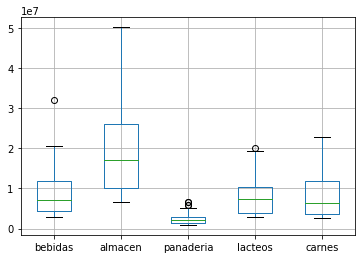

In [30]:
#Ahora visualizaremos si nuestras variables tienen outliers y si es así aplicaremos diferentes metodos 
#para lidiar con esos valores
boxplot = data2.boxplot(column=['bebidas','almacen','panaderia','lacteos','carnes']) 

In [44]:
#Bebidas, panaderia y lacteos tienen outliers, así que se aplicará en metodo de cuartiles a estas 3 variables
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=data2["bebidas"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

outliers_bebidas= data2[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_bebidas

Limite superior permitido 22825184.4515
Limite inferior permitido -6724636.7525


,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,tarjetas_credito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
59,01/12/2021,183983.2,31595.7,183983151.9,178866721.2,5116430.634,183983151.9,56640033.15,55432191.37,62999676.15,...,45199914.72,5859939.041,16275221.46,21265049.45,5863700.608,1679028.685,21753939.73,4759532.634,12669269.76,16665123.15


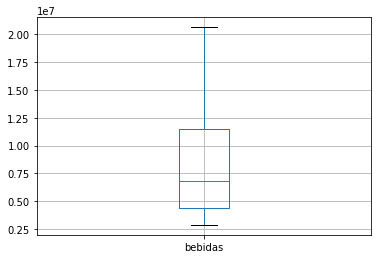

In [45]:
#Bebidas Limpios
data_clean_bebidas= data2[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
boxplot = data_clean_bebidas.boxplot(column=['bebidas']) 

In [46]:
y=data2["panaderia"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

outliers_panaderia= data2[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_panaderia

Limite superior permitido 5344003.4675
Limite inferior permitido -946571.9125000001


,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,tarjetas_credito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
59,01/12/2021,183983.2,31595.7,183983151.9,178866721.2,5.116431e+06,183983151.9,56640033.15,55432191.37,62999676.15,...,45199914.72,5859939.041,16275221.46,21265049.45,5863700.608,1679028.685,21753939.73,4759532.634,12669269.76,16665123.15
62,01/03/2022,16.5,24612.4,168982502.3,164321107.3,4.661350e+05,168982502.3,51262080.99,47364363.88,26367781.20,...,45418860.16,5922819.509,18419163.96,20827602.02,6886240.029,1589119.305,22942013.09,3912852.426,10898787.99,5776003.50
63,01/04/2022,177148.1,24140.5,177148082.8,173003799.1,4.144284e+06,177148082.8,53189998.68,50063972.79,65357591.09,...,49991675.91,6746166.557,19309461.59,22877841.24,6510665.781,1719458.547,23131265.85,4228053.874,3215054.70,11910475.62
64,01/05/2022,179639.2,23234.2,179639238.6,175358487.5,4.280751e+06,179639238.6,52738110.62,49886787.86,68070088.23,...,50150351.46,6667329.665,20121124.43,22841532.85,6314109.470,1779482.857,23578638.71,5213152.564,12039595.55,12349980.06


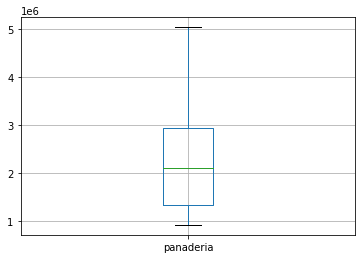

In [47]:
#panaderia Limpios
data_clean_panaderia= data2[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
boxplot = data_clean_panaderia.boxplot(column=['panaderia']) 

In [48]:
y=data2["lacteos"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

outliers_lacteos= data2[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_lacteos

Limite superior permitido 19940661.0455
Limite inferior permitido -5569362.3025


,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,tarjetas_credito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
64,01/05/2022,179639.2,23234.2,179639238.6,175358487.5,4280751.113,179639238.6,52738110.62,49886787.86,68070088.23,...,50150351.46,6667329.665,20121124.43,22841532.85,6314109.47,1779482.857,23578638.71,5213152.564,12039595.55,12349980.06


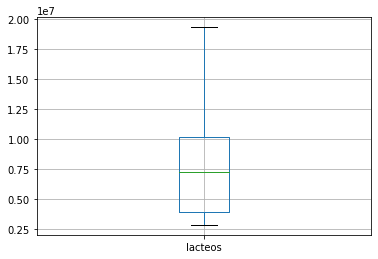

In [49]:
#LacteosLimpios
data_clean_lacteos= data2[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
boxplot = data_clean_lacteos.boxplot(column=['lacteos']) 

In [ ]:
boxplot = data2.boxplot(column=['bebidas','almacen','panaderia','lacteos','carnes']) 